IIUM_ANALYTICA RESERVOIR SIMULATION MODEL

Group Members:
1. Hanis Karmila/ hanissuhaimi67@gmail.com/ Bachelor Computer Science (Data Science) (Honours) 
2. Husna Ezzah/ husnaezzh@gmail.com/ Bachelor Computer Science (Data Science) (Honours)
3. Nurul Aiman/ aimnzr02@gmail.com/ Bachelor Computer Science (Data Science) (Honours)
4. A'wathif/ oawathif@gmail.com/ Bachelor Computer Science (Data Science) (Honours)

Supervisor: Dr. Norzaliza binti Md Nor

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

DATA PREPARATION

In [2]:
# Loading the reservoir's data
def load_data(reservoir_path):
    production_data = pd.read_csv(os.path.join(reservoir_path, 'production.csv'))
    state_data = pd.read_csv(os.path.join(reservoir_path, 'state.csv'))
    return production_data, state_data

In [3]:
# Loading training data for all reservoirs
train_reservoirs = ['Reservoir0', 'Reservoir2', 'Reservoir3', 'Reservoir4', 'Reservoir7', 'Reservoir8',                                 'Reservoir9', 'Reservoir10', 'Reservoir12', 'Reservoir13',
                    'Reservoir14', 'Reservoir17', 'Reservoir19', 'Reservoir21', 'Reservoir23', 'Reservoir24', 'Reservoir25', 'Reservoir27', 'Reservoir28', 'Reservoir31',
                    'Reservoir32', 'Reservoir33', 'Reservoir34', 'Reservoir35', 'Reservoir38', 'Reservoir39', 'Reservoir40', 'Reservoir41', 'Reservoir42', 'Reservoir43',
                    'Reservoir48', 'Reservoir49', 'Reservoir50', 'Reservoir52', 'Reservoir54', 'Reservoir55', 'Reservoir58', 'Reservoir59', 'Reservoir62', 'Reservoir63',
                    'Reservoir64', 'Reservoir65', 'Reservoir67', 'Reservoir68', 'Reservoir69', 'Reservoir70', 'Reservoir71', 'Reservoir72', 'Reservoir73', 'Reservoir77',
                    'Reservoir78', 'Reservoir80', 'Reservoir83', 'Reservoir84', 'Reservoir85', 'Reservoir87', 'Reservoir88', 'Reservoir89', 'Reservoir92', 'Reservoir94',
                    'Reservoir95', 'Reservoir97']
train_data = {}
for reservoir in train_reservoirs:
    production, state = load_data(f'dataset/training/{reservoir}')
    train_data[reservoir] = {'production': production, 'state': state}

In [4]:
# Loading validation data for all reservoirs
validation_reservoirs = ['Reservoir1', 'Reservoir5', 'Reservoir11', 'Reservoir15', 'Reservoir18', 'Reservoir20', 'Reservoir22', 'Reservoir29', 'Reservoir30', 'Reservoir37',
                    'Reservoir44', 'Reservoir45', 'Reservoir47', 'Reservoir51', 'Reservoir53', 'Reservoir57', 'Reservoir60', 'Reservoir61', 'Reservoir74', 'Reservoir75',
                    'Reservoir79', 'Reservoir81', 'Reservoir82', 'Reservoir90', 'Reservoir91', 'Reservoir93']

validation_data = {}
for reservoir in validation_reservoirs:
    production, state = load_data(f'dataset/validation/{reservoir}')
    train_data[reservoir] = {'production': production, 'state': state}

DATA EXPLORATION

In [5]:
# 1. Basic Data Overview (Production)
def explore_data(production, name="Production Data"):
    print(f"Exploring {name}:")
    
    # Display first few rows
    print("\nFirst few rows:")
    print(production.head(), "\n")
    
    # Display summary statistics
    print("Summary statistics:")
    print(production.describe(), "\n")
    
    # Display count of missing values
    print(f"Missing values in {name}:")
    print(production.isnull().sum(), "\n")
    
    # Display data types of each column
    print(f"Data types in {name}:")
    print(production.dtypes, "\n")
    
explore_data(production, name="Production Data")

Exploring Production Data:

First few rows:
         Date  Gas production cumulative  Oil production cumulative  \
0  1998-01-01                    0.00000                    0.00000   
1  1998-01-02                14759.72852                15169.29980   
2  1998-01-05                59038.91406                60677.19922   
3  1998-01-14               191876.46880               197200.90630   
4  1998-02-10               590389.12500               606772.00000   

   Water production cumulative  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0   

Summary statistics:
       Gas production cumulative  Oil production cumulative  \
count               2.600000e+02               2.600000e+02   
mean                7.318423e+07               7.456123e+07   
std                 3.751776e+07               3.764219e+07   
min                 0.000000e+00               0.000000e+

In [6]:
# 1. Basic Data Overview (State)
def explore_data(state, name="State Data"):
    print(f"Exploring {name}:")
    
    # Display first few rows
    print("\nFirst few rows:")
    print(state.head(), "\n")
    
    # Display summary statistics
    print("Summary statistics:")
    print(state.describe(), "\n")
    
    # Display count of missing values
    print(f"Missing values in {name}:")
    print(state.isnull().sum(), "\n")
    
    # Display data types of each column
    print(f"Data types in {name}:")
    print(state.dtypes, "\n")
    
explore_data(state, name="State Data")

Exploring State Data:

First few rows:
           X           Y    Depth      PERMX      PERMY    PERMZ    PORO  \
0  552292.00  6798283.88 -8197.92    22.2009    22.2009   0.7285  0.1156   
1  552720.14  6798277.25 -8191.53   297.7664   297.7664   6.3385  0.1783   
2  553148.33  6798270.75 -8186.99   259.5199   259.5199   5.6524  0.1750   
3  553576.81  6798264.63 -8184.66   739.3747   739.3747  13.5253  0.2002   
4  554005.80  6798259.13 -8182.89  1466.6700  1466.6700  23.9352  0.2168   

   Transmissibility  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0   

Summary statistics:
                   X             Y        Depth        PERMX        PERMY  \
count    5183.000000  5.183000e+03  5183.000000  5183.000000  5183.000000   
mean   555566.700916  6.803508e+06 -8213.960747   627.448114   627.448114   
std      2871.655651  3.122352e+03   284.940483   684.062875   684.062875   
min    550035.160000  6.798242e+06 -8968.5

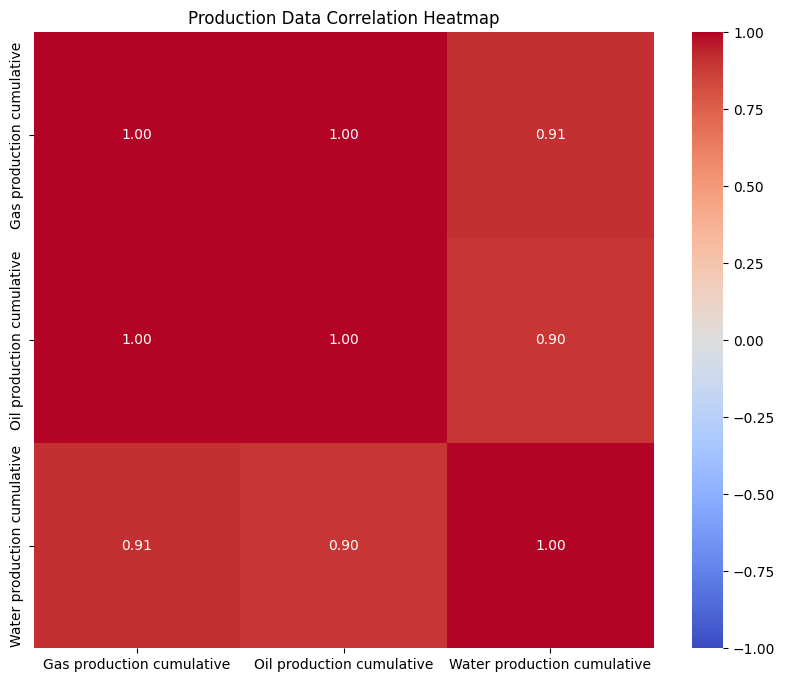

In [7]:
# 2. Visualizations (Production)

# Correlation Heatmap
def plot_correlation_heatmap(production, title):
    numeric_data = production.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_correlation_heatmap(production, "Production Data Correlation Heatmap")

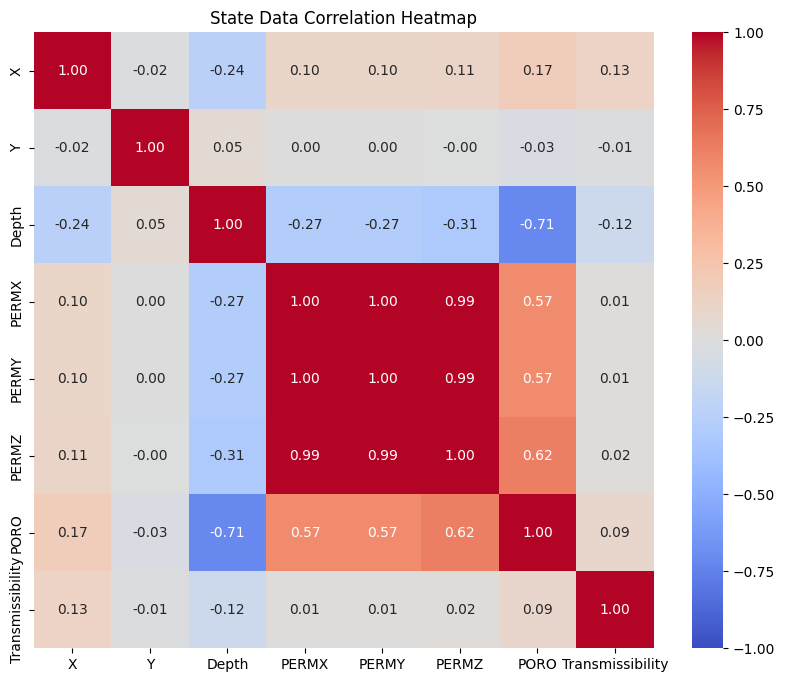

In [8]:
# 2. Visualizations (State)

# Correlation Heatmap
def plot_correlation_heatmap(state, title):
    numeric_data = state.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_correlation_heatmap(state, "State Data Correlation Heatmap")

<Figure size 1200x800 with 0 Axes>

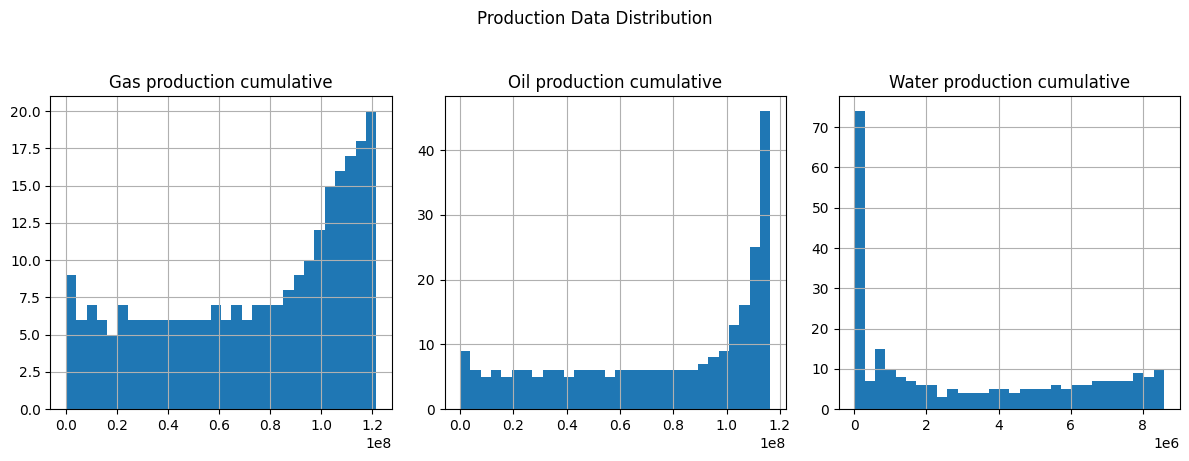

In [9]:
# 3. Distribution of Variables (Production)
def plot_distribution(production, title):
    num_vars = len(production.columns)
    num_cols = 3
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols != 0)
    
    plt.figure(figsize=(12, 4 * num_rows)) 
    production.hist(bins=30, layout=(num_rows, num_cols), figsize=(12, 4 * num_rows))
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

plot_distribution(production, "Production Data Distribution")

<Figure size 1200x1200 with 0 Axes>

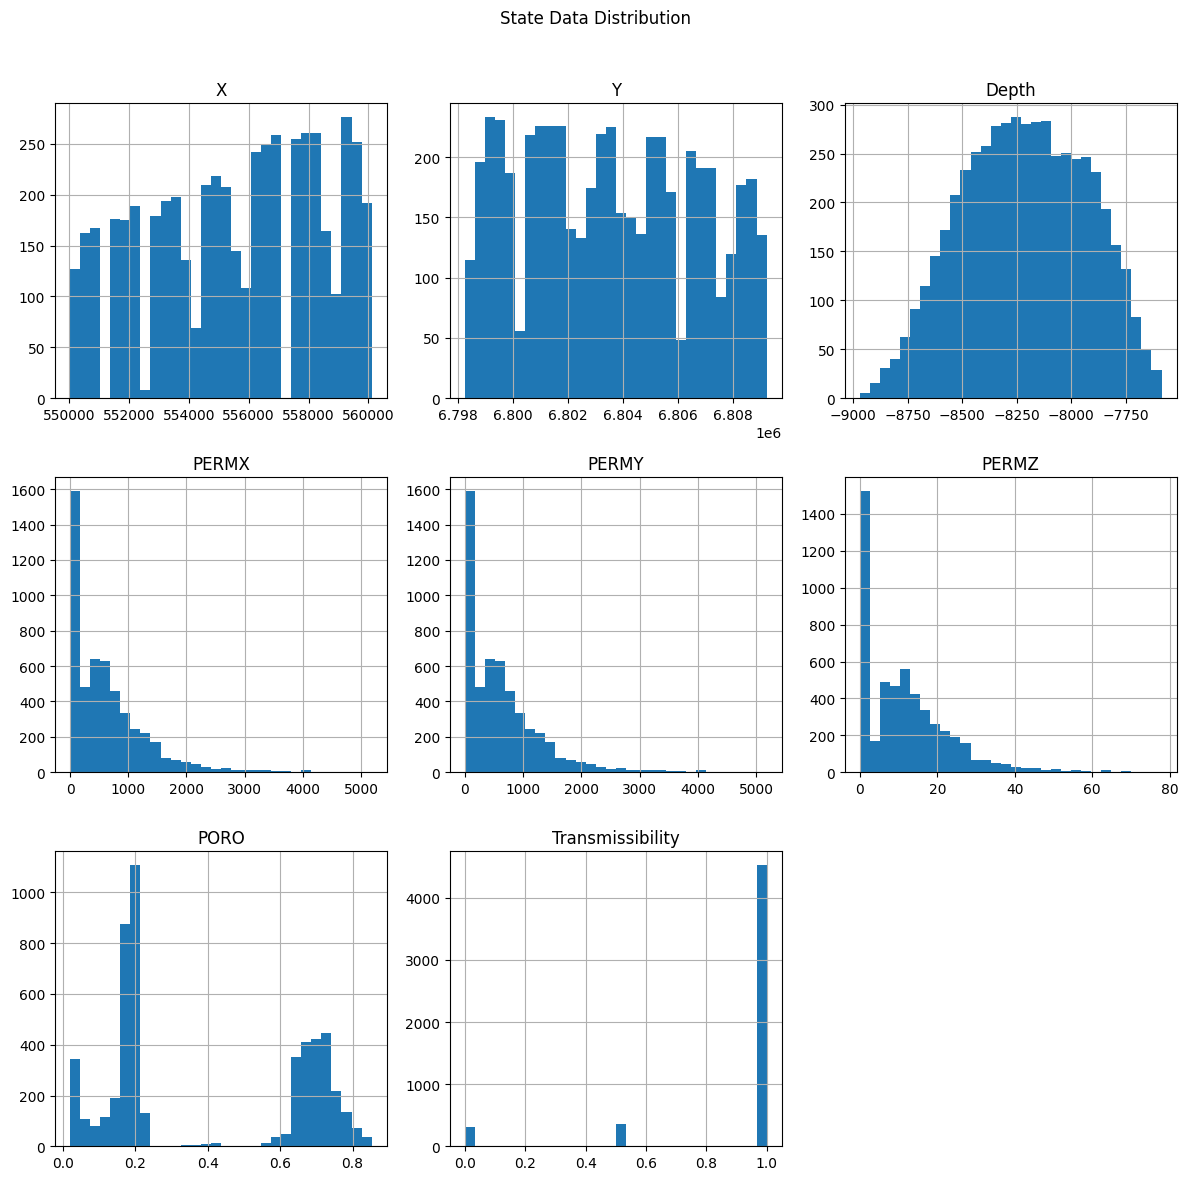

In [10]:
# 3. Distribution of Variables (State)
def plot_distribution(state, title):
    num_vars = len(state.columns)
    num_cols = 3
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols != 0)
    
    plt.figure(figsize=(12, 4 * num_rows)) 
    state.hist(bins=30, layout=(num_rows, num_cols), figsize=(12, 4 * num_rows))
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

plot_distribution(state, "State Data Distribution")

FEATURE ENGINEERING

In [11]:
# Create features from state data
def create_features(state_data, production_data=None):
    features = {
        'PERMX': state_data['PERMX'].mean(),
        'PERMY': state_data['PERMY'].mean(),
        'PERMZ': state_data['PERMZ'].mean(),
        'PORO': state_data['PORO'].mean(),
        'Transmissibility': state_data['Transmissibility'].mean()
    }
    
    if production_data is not None: 
        # Add a feature indicating if water production is ever zero in the production dataset
        features['Zero_Water_Production'] = int((production_data['Water production cumulative'] == 0).any())
    else:
        # Default value for Zero_Water_Production if production data is not available
        features['Zero_Water_Production'] = 0  # Or a value that makes sense in your context  
        
    return np.array([features[key] for key in sorted(features.keys())])

In [12]:
# Generate features for all reservoirs in training data
train_features = []
train_targets = []
for reservoir in train_data:
    production = train_data[reservoir]['production']
    features= create_features(train_data[reservoir]['state'], production_data=production)
    targets = production[['Gas production cumulative', 'Oil production cumulative', 'Water production cumulative']]
    train_features.append(features)
    train_targets.append(targets)

In [13]:
# Generate features for all reservoirs in validation data
validation_features = []
validation_targets = []
for reservoir in validation_data:
    production = validation_data[reservoir]['production']
    features= create_features(validation_data[reservoir]['state'], production_data=production)
    targets = production[['Gas production cumulative', 'Oil production cumulative', 'Water production cumulative']]
    validation_features.append(features)
    validation_targets.append(targets)

In [14]:
X = pd.DataFrame(train_features)
y = pd.concat(train_targets).reset_index(drop=True)

In [15]:
def aggregate_production(production_data):
    # Taking the last value of the cumulative production data to match with state data
    return production_data[['Gas production cumulative', 'Oil production cumulative', 'Water production cumulative']].iloc[-1]

aggregated_targets = []
for reservoir in train_data:
    aggregated_target = aggregate_production(train_data[reservoir]['production'])
    aggregated_targets.append(aggregated_target)

# Convert to a DataFrame
y = pd.DataFrame(aggregated_targets)

# Now X and y should have the same number of rows
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (88, 6)
y shape: (88, 3)


MODEL SELECTION

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [17]:
# Standardize and Normalize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [18]:
# Model Training
model = RandomForestRegressor(random_state =42, n_estimators = 100)
model.fit(X_train_scaled, y_train)

# Model validation
y_pred = model.predict(X_val_scaled)

In [19]:
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

PREDICTION FOR TESTING DATA

In [20]:
def prediction_production(test_state_path, model):
    test_state = pd.read_csv(test_state_path)
    features = create_features(test_state)
    features_df = pd.DataFrame([features])
    return model.predict(features_df)

MONTE CARLO SIMULATION

In [21]:
def run_monte_carlo(test_state_path, model, num_simulations=1000, production_data=None):
    predictions = []
    test_state = pd.read_csv(test_state_path)
    
    # Convert features to numpy array with correct shape
    features_array = create_features(test_state, production_data=production_data)  
    
    for _ in range(num_simulations):
        noise = np.random.normal(0, 0.1, size=features_array.shape)
        
        # Reduce noise if water production is zero
        if features_array[-1] == 1:
            noise *= 0.1 # Reduce the noise level
            
        perturbed_features = features_array + noise
        
        # Predict with perturbed features
        prediction = model.predict(perturbed_features.reshape(1, -1))  # Ensure correct shape
        predictions.append(prediction[0])  # Append first element of prediction
    
    return np.array(predictions)  

OUTPUT

In [22]:
# Define the path where you want to save the results
output_dir = 'submissions/analytica_test_results/'

os.makedirs(output_dir, exist_ok=True)

In [23]:
def save_production_file(reservoir_number, predictions, template_path):
    
    template_df = pd.read_csv(template_path)
    template_dates = pd.to_datetime(template_df['Date'])
    
    # Convert predictions to a numpy array
    predictions = np.array(predictions)
    
    # If predictions are more than template length, reduce them
    if len(predictions) > len(template_dates): 
        predictions = predictions[:len(template_dates)]
        
    # If predictions are fewer than the template length, repeat
    elif len(predictions) < len(template_dates):
        factor = len(template_dates) // len(predictions)
        predictions = np.repeat(predictions, factor, axis=0)[:len(template_dates)]

    # Create DataFrame with predictions
    production_df = pd.DataFrame({
        'Date': template_dates,
        'Gas production cumulative': predictions[:, 0] if predictions.shape[1] > 0 else np.nan,
        'Oil production cumulative': predictions[:, 1] if predictions.shape[1] > 1 else np.nan,
        'Water production cumulative': predictions[:, 2] if predictions.shape[1] > 2 else np.nan,
    })
    
    # Save to CSV
    production_df.to_csv(os.path.join(output_dir, f'Reservoir{reservoir_number}_production.csv'), index=False)

In [24]:
# Generate predictions for testing reservoirs
test_reservoirs = ['Reservoir6', 'Reservoir16', 'Reservoir26', 'Reservoir36', 'Reservoir46', 'Reservoir56', 'Reservoir66', 'Reservoir76', 'Reservoir86', 'Reservoir96']

for reservoir in test_reservoirs:
    reservoir_number = reservoir.replace('Reservoir', '')
    
    # Run Monte Carlo for current reservoir
    mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000, production_data=None)
    
    # Save the results based on template for current reservoir
    save_production_file(reservoir_number, mc_results, 'dataset/Template_Reservoir{Number}_production.csv')

VISUALIZATION (OUTPUT)

1. Monte Carlo Simulation Results Distribution

Reservoir 6

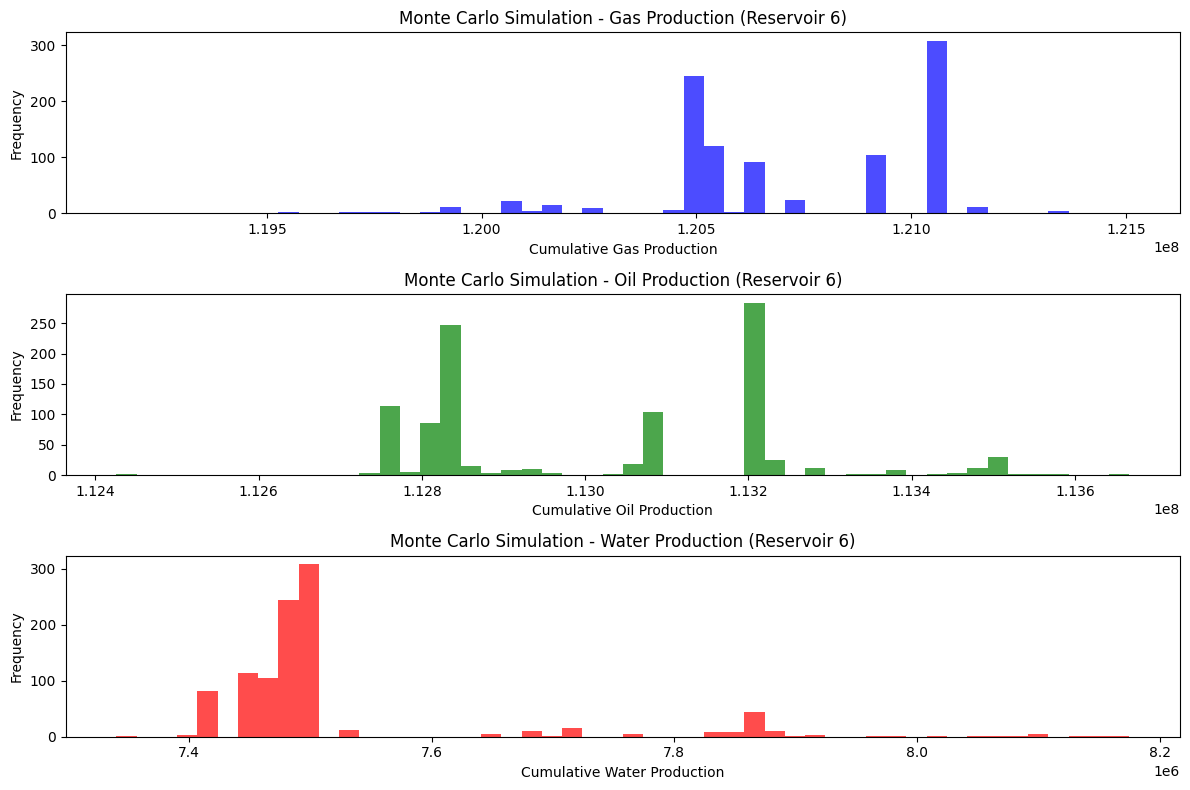

In [25]:
def plot_monte_carlo_distribution(mc_results, reservoir_number):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.hist(mc_results[:, 0], bins=50, alpha=0.7, color='blue', label='Gas Production')
    plt.title(f'Monte Carlo Simulation - Gas Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Gas Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 2)
    plt.hist(mc_results[:, 1], bins=50, alpha=0.7, color='green', label='Oil Production')
    plt.title(f'Monte Carlo Simulation - Oil Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Oil Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 3)
    plt.hist(mc_results[:, 2], bins=50, alpha=0.7, color='red', label='Water Production')
    plt.title(f'Monte Carlo Simulation - Water Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Water Production')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

reservoir_number = 6
mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000, production_data=None)
plot_monte_carlo_distribution(mc_results, reservoir_number)

Reservoir 36

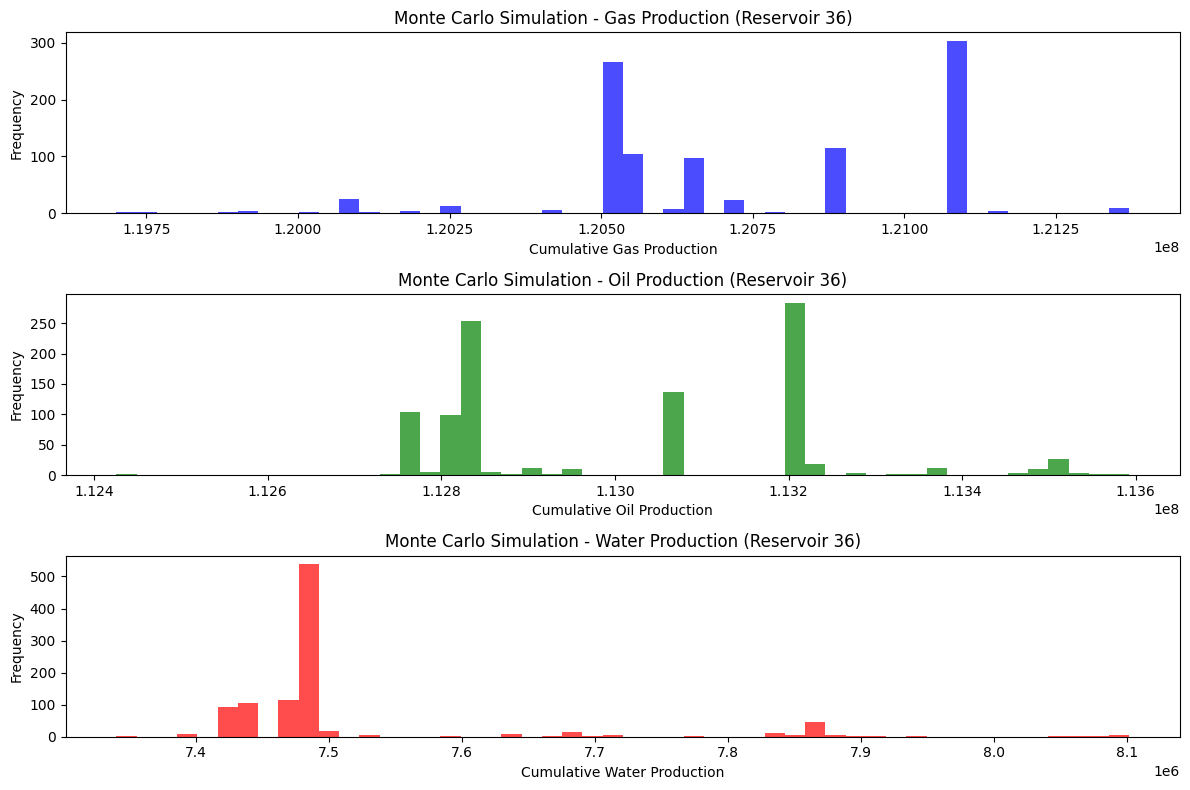

In [26]:
def plot_monte_carlo_distribution(mc_results, reservoir_number):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.hist(mc_results[:, 0], bins=50, alpha=0.7, color='blue', label='Gas Production')
    plt.title(f'Monte Carlo Simulation - Gas Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Gas Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 2)
    plt.hist(mc_results[:, 1], bins=50, alpha=0.7, color='green', label='Oil Production')
    plt.title(f'Monte Carlo Simulation - Oil Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Oil Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 3)
    plt.hist(mc_results[:, 2], bins=50, alpha=0.7, color='red', label='Water Production')
    plt.title(f'Monte Carlo Simulation - Water Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Water Production')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

reservoir_number = 36
mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000, production_data=None)
plot_monte_carlo_distribution(mc_results, reservoir_number)

Reservoir 66

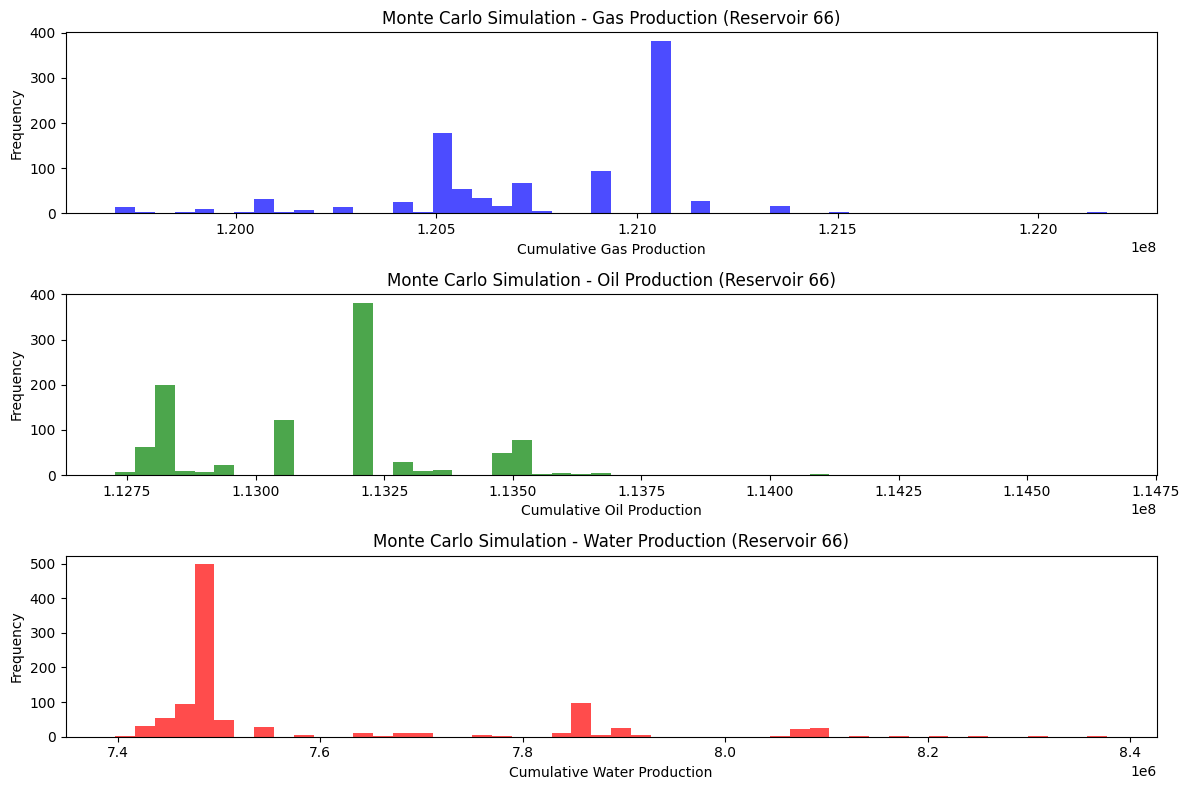

In [27]:
def plot_monte_carlo_distribution(mc_results, reservoir_number):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.hist(mc_results[:, 0], bins=50, alpha=0.7, color='blue', label='Gas Production')
    plt.title(f'Monte Carlo Simulation - Gas Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Gas Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 2)
    plt.hist(mc_results[:, 1], bins=50, alpha=0.7, color='green', label='Oil Production')
    plt.title(f'Monte Carlo Simulation - Oil Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Oil Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 3)
    plt.hist(mc_results[:, 2], bins=50, alpha=0.7, color='red', label='Water Production')
    plt.title(f'Monte Carlo Simulation - Water Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Water Production')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

reservoir_number = 66
mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000, production_data=None)
plot_monte_carlo_distribution(mc_results, reservoir_number)

Reservoir 96

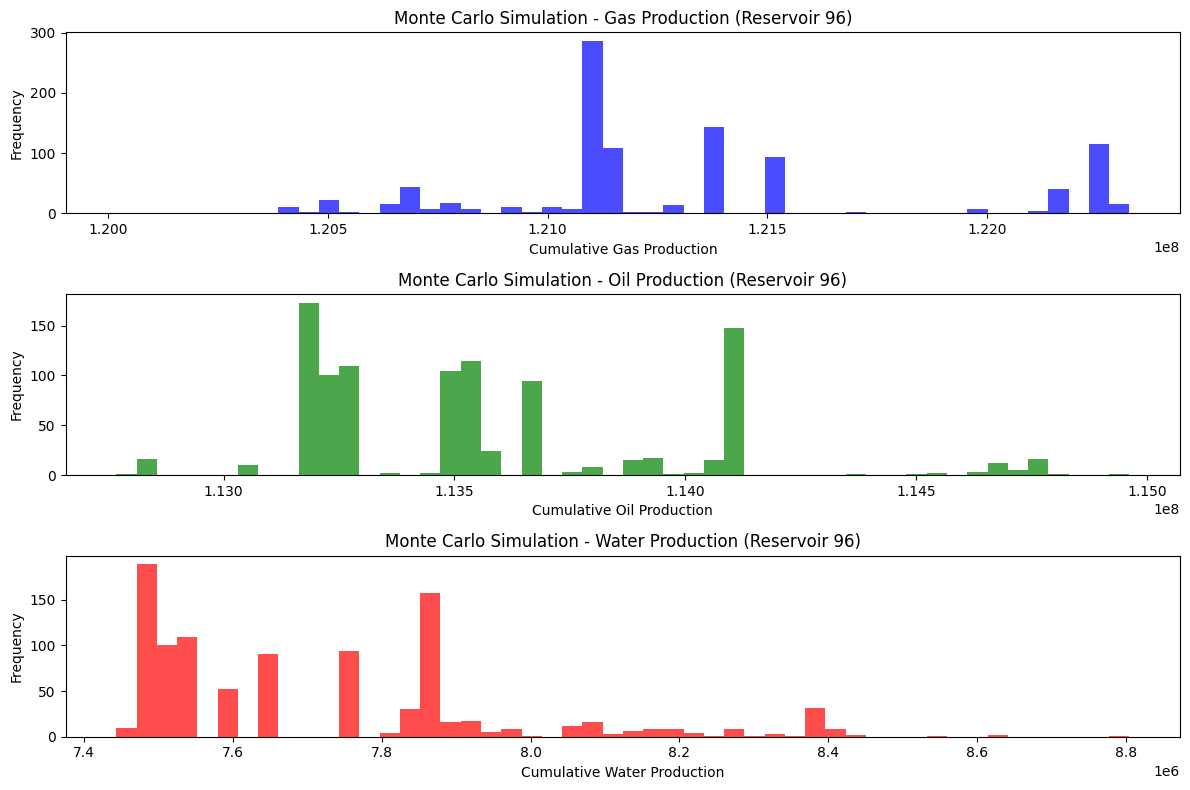

In [28]:
def plot_monte_carlo_distribution(mc_results, reservoir_number):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.hist(mc_results[:, 0], bins=50, alpha=0.7, color='blue', label='Gas Production')
    plt.title(f'Monte Carlo Simulation - Gas Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Gas Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 2)
    plt.hist(mc_results[:, 1], bins=50, alpha=0.7, color='green', label='Oil Production')
    plt.title(f'Monte Carlo Simulation - Oil Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Oil Production')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 3)
    plt.hist(mc_results[:, 2], bins=50, alpha=0.7, color='red', label='Water Production')
    plt.title(f'Monte Carlo Simulation - Water Production (Reservoir {reservoir_number})')
    plt.xlabel('Cumulative Water Production')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

reservoir_number = 96
mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000, production_data=None)
plot_monte_carlo_distribution(mc_results, reservoir_number)

2. Feature Importance from Random Forest Model

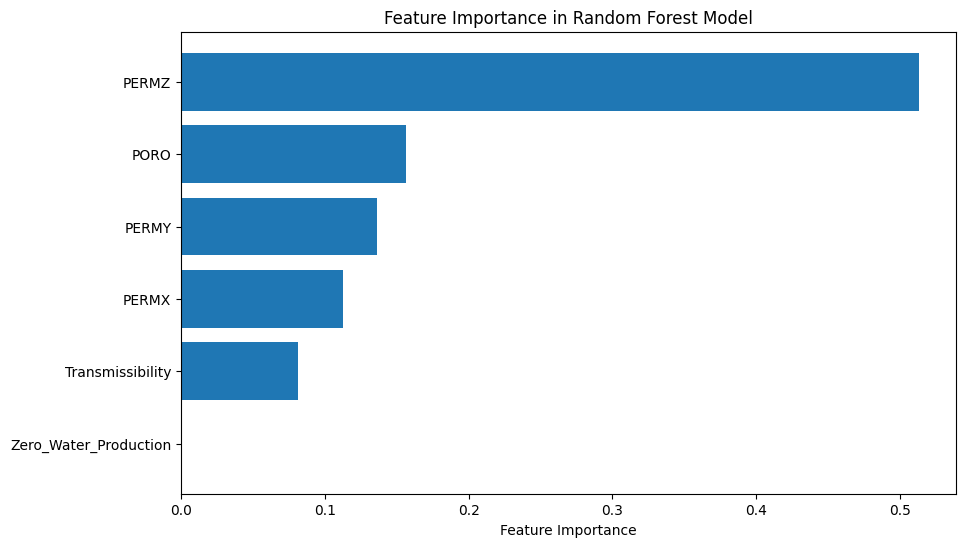

In [29]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance in Random Forest Model')
    plt.show()

feature_names = ['PERMX', 'PERMY', 'PERMZ', 'PORO', 'Transmissibility', 'Zero_Water_Production']
plot_feature_importance(model, feature_names)

3. Summary Statistics for Monte Carlo Simulations Results for All Test Reservoirs

In [30]:
# Function to compute summary statistics for a single reservoir
def monte_carlo_summary_statistics(mc_results, reservoir_number):
    summary_stats = {
        'Reservoir': reservoir_number,
        'Production Type': ['Gas Production', 'Oil Production', 'Water Production'],
        'Mean': [np.mean(mc_results[:, 0]), np.mean(mc_results[:, 1]), np.mean(mc_results[:, 2])],
        'Median': [np.median(mc_results[:, 0]), np.median(mc_results[:, 1]), np.median(mc_results[:, 2])],
        'Standard Deviation': [np.std(mc_results[:, 0]), np.std(mc_results[:, 1]), np.std(mc_results[:, 2])],
        'Min': [np.min(mc_results[:, 0]), np.min(mc_results[:, 1]), np.min(mc_results[:, 2])],
        'Max': [np.max(mc_results[:, 0]), np.max(mc_results[:, 1]), np.max(mc_results[:, 2])]
    }
    
    return pd.DataFrame(summary_stats)

# Function to compute and store summary statistics for multiple reservoirs
def compute_summary_for_multiple_reservoirs(test_reservoirs):
    combined_summary = pd.DataFrame()

    for reservoir in test_reservoirs:
        reservoir_number = reservoir.replace('Reservoir', '')
        
        # Run Monte Carlo for current reservoir
        mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000)
        
        # Compute summary statistics for current reservoir
        summary_stats = monte_carlo_summary_statistics(mc_results, reservoir_number)
        
        # Append the summary stats for this reservoir
        combined_summary = pd.concat([combined_summary, summary_stats], ignore_index=True)

    return combined_summary

# List of test reservoirs
test_reservoirs = ['Reservoir6', 'Reservoir16', 'Reservoir26', 'Reservoir36', 'Reservoir46', 'Reservoir56', 'Reservoir66', 'Reservoir76', 'Reservoir86', 'Reservoir96']

# Compute and store summary statistics for all reservoirs
combined_summary_df = compute_summary_for_multiple_reservoirs(test_reservoirs)

# Display the combined DataFrame
print(combined_summary_df)

# Save the combined summary to a CSV
combined_summary_df.to_csv('Reservoirs_summary_statistics.csv', index=False)

   Reservoir   Production Type          Mean        Median  \
0          6    Gas Production  1.207387e+08  1.206364e+08   
1          6    Oil Production  1.130213e+08  1.130592e+08   
2          6  Water Production  7.521444e+06  7.484102e+06   
3         16    Gas Production  1.207318e+08  1.206364e+08   
4         16    Oil Production  1.130137e+08  1.130592e+08   
5         16  Water Production  7.519327e+06  7.484102e+06   
6         26    Gas Production  1.207291e+08  1.206364e+08   
7         26    Oil Production  1.130112e+08  1.129040e+08   
8         26  Water Production  7.520089e+06  7.484102e+06   
9         36    Gas Production  1.207334e+08  1.206364e+08   
10        36    Oil Production  1.130045e+08  1.129334e+08   
11        36  Water Production  7.511719e+06  7.484102e+06   
12        46    Gas Production  1.207200e+08  1.206364e+08   
13        46    Oil Production  1.130084e+08  1.129040e+08   
14        46  Water Production  7.520772e+06  7.484102e+06   
15      

4. Correlation Heatmap of Monte Carlo Simulation Results

In [31]:
# Aggregate results
def compute_all_mc_results(test_reservoirs):
    all_results = []

    for reservoir in test_reservoirs:
        reservoir_number = reservoir.replace('Reservoir', '')
        
        # Run Monte Carlo for current reservoir
        mc_results = run_monte_carlo(f'dataset/test/Reservoir{reservoir_number}_state.csv', model, num_simulations=1000)
        
        # Append the results for this reservoir
        all_results.append(mc_results)
    
    return np.vstack(all_results)  # Combine all results into a single array

# Compute all Monte Carlo results for test reservoirs
all_mc_results = compute_all_mc_results(test_reservoirs)

In [32]:
# Create a DataFrame from the aggregated Monte Carlo results
results_df = pd.DataFrame(all_mc_results, columns=['Gas Production', 'Oil Production', 'Water Production'])

# Calculate the correlation matrix
correlation_matrix = results_df.corr()
print(correlation_matrix)

                  Gas Production  Oil Production  Water Production
Gas Production          1.000000        0.770455          0.162600
Oil Production          0.770455        1.000000          0.737071
Water Production        0.162600        0.737071          1.000000


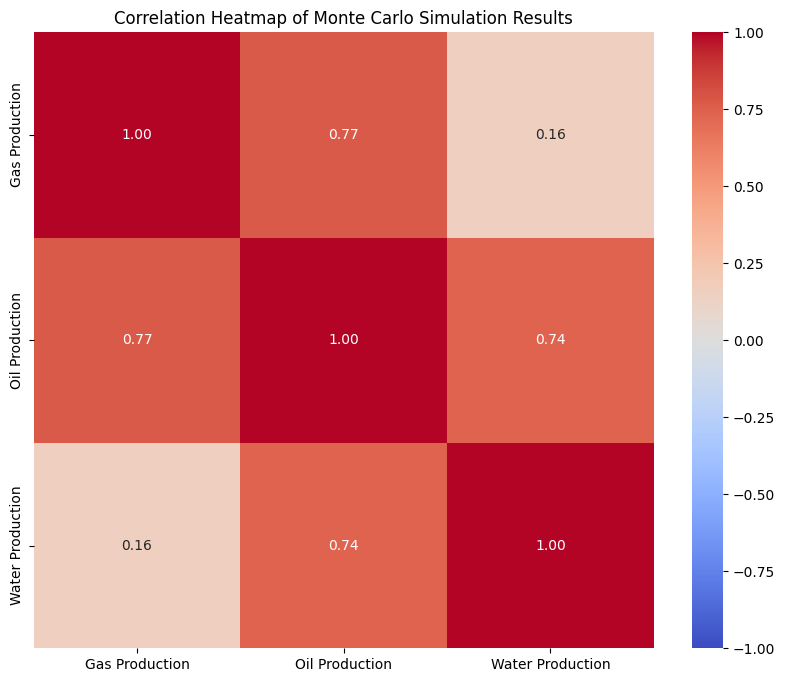

In [33]:
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Monte Carlo Simulation Results')
    plt.show()

# Plot the heatmap
plot_correlation_heatmap(correlation_matrix)